## E-commerce purchases project

# importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# importing data set

In [3]:
df= pd.read_csv('ecommerce-purchases-raw.csv')

In [4]:
df.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


# handling column

In [7]:
# converting Credit card and CC security code data type to obj as they should not be considerd numerical data 

df['Credit Card']= df['Credit Card'].astype(str)
df['CC Security Code']= df['CC Security Code'].astype(str)

In [8]:
# converting Language column to upper case 

df['Language'] = df['Language'].str.upper()

# checking for missing values

In [18]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

# checking for duplicated values

In [21]:
df.duplicated().sum()

0

# Exploratory Data Analysis

# 1. Data distribution

Q1: Were most purchases made AM or PM?

The graph below shows the number of purchases was not significantly affected by the day time.

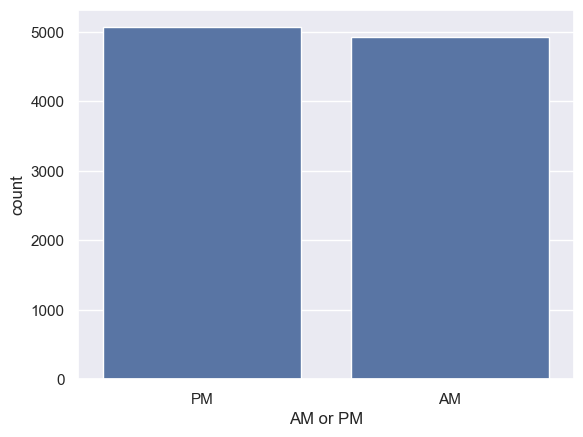

In [27]:
Time_data = df['AM or PM']
plot = sns.countplot(x = Time_data ,  data = df)

Q2: What is the most coomonly used credit card provider?

the graph below shows that "JCB 16 digit" and "Visa 16 digit" were the most common card providers

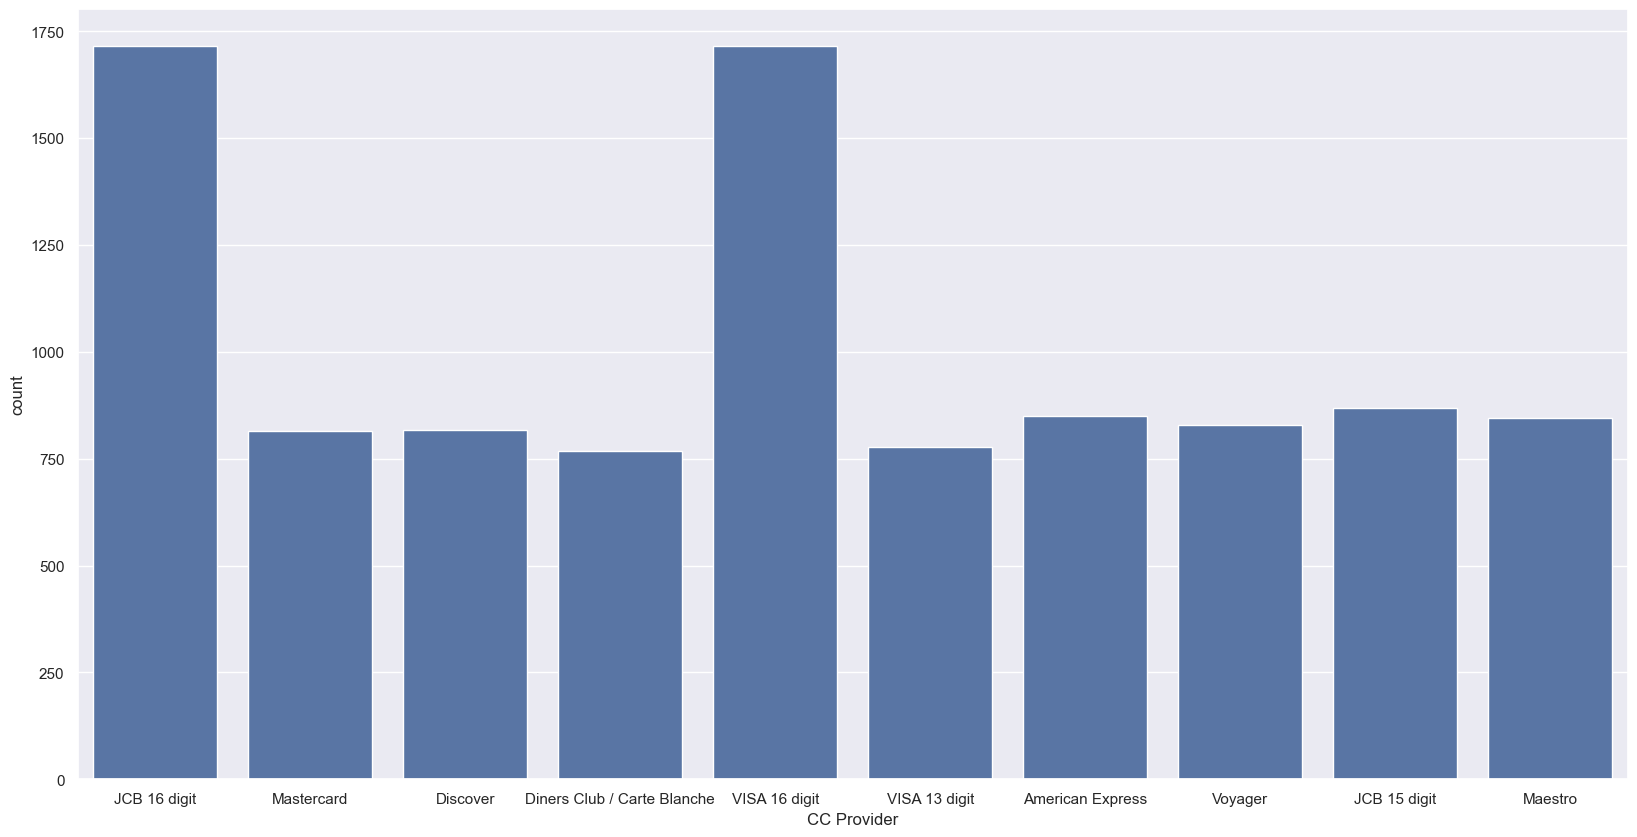

In [82]:
CC_provider_data = df['CC Provider']
plt.figure(figsize=(20, 10))
plot = sns.countplot(x = CC_provider_data ,  data = df)

Q3: What is the most common language preference on the website?

FR: French - 
El: Greek - 
IT: Italian - 
EN: English - 
ZH: Chinese - 
PT: Portuguese - 
RU: Russian - 
ES: Spanish - 
DE: German 

source: https://www.science.co.il/language/Codes.php

The graph below shows that the two most common languages are French and Greek 

However, the language distribution is pretty even acroos the data set

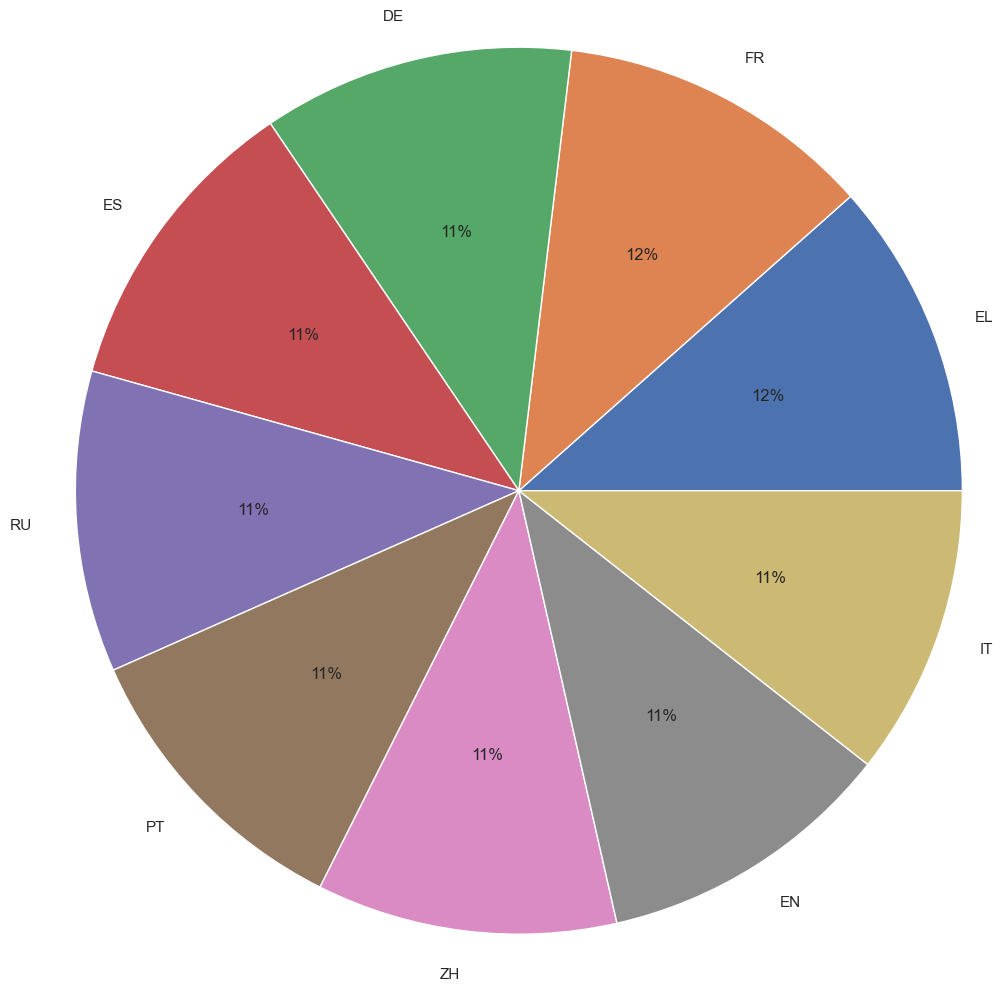

In [149]:
language_data = df['Language'].value_counts().tolist()
language_labels = df['Language'].unique()

#create pie chart
plt.pie(language_data, labels = language_labels, autopct='%.0f%%', radius= 3)
plt.show()

# 2. Unilateral analysis

Q1: Which companies were most purchases made from?

In [178]:
df['Company'].value_counts().head()

Company
Brown Ltd       15
Smith Group     15
Smith PLC       13
Smith LLC       13
Williams LLC    12
Name: count, dtype: int64

Q2: What are the maximum, minimum, and average purchase prices?

In [103]:
df['Purchase Price'].describe().round(2)

count    10000.00
mean        50.35
std         29.02
min          0.00
25%         25.15
50%         50.50
75%         75.77
max         99.99
Name: Purchase Price, dtype: float64

<Axes: >

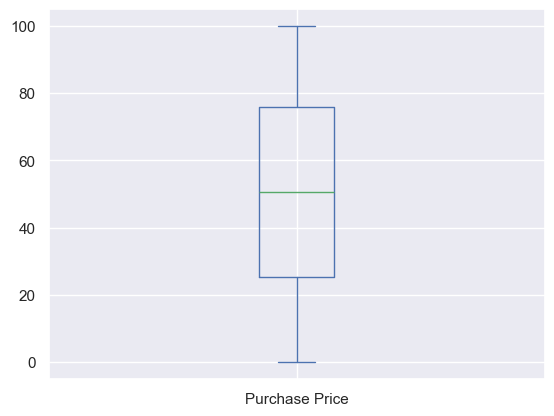

In [107]:
# visualizing price statistical data

df['Purchase Price'].plot.box()

Q3: What are the most common job titles of buyers?

In [109]:
df['Job'].value_counts().head()

Job
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: count, dtype: int64

# 3. Bilateral analysis

Q1: Which companies had the highest total purchase cost?

In [202]:
df.groupby('Company')['Purchase Price'].sum().nlargest(5).reset_index()

,Company,Purchase Price
0,Brown Ltd,796.38
1,Williams LLC,723.63
2,Smith LLC,637.92
3,Smith PLC,601.37
4,Johnson Ltd,600.61


Q2: What were the job titles of the buyers with the highest average purchase cost?

In [208]:
df.groupby('Job')['Purchase Price'].mean().round(2).nlargest().reset_index()

,Job,Purchase Price
0,Trade mark attorney,73.80
1,Translator,70.78
2,Investment analyst,69.09
3,"Accountant, chartered management",69.08
4,"Designer, industrial/product",68.71


<Axes: xlabel='Language', ylabel='count'>

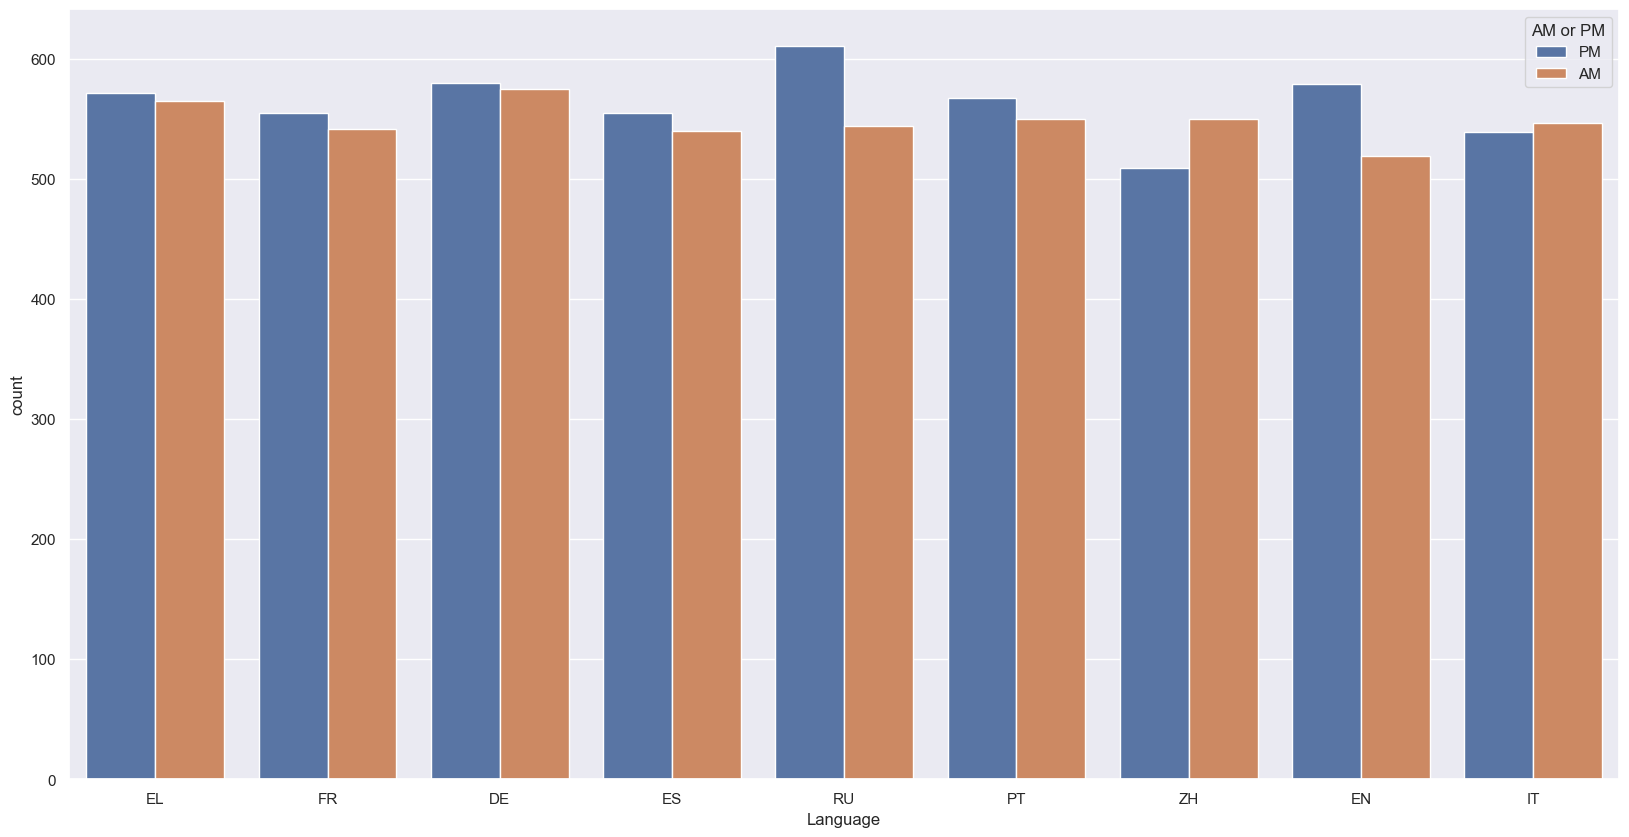

In [214]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Language'], hue=df['AM or PM'])